# INTRODUCTION

Clustering is a powerful technique in data analysis and machine learning, used to group similar data points together. In this study, we focus on the application of the k-medoids clustering algorithm on the Wheat Seeds dataset. This dataset contains measurements of various physical characteristics of wheat kernels, such as area, perimeter, compactness, kernel length, kernel width, asymmetry coefficient, and kernel groove length. The objective is to classify these seeds into different varieties based on their physical attributes.

K-medoids is a robust clustering algorithm that is less sensitive to outliers compared to k-means, as it minimizes the sum of dissimilarities between data points and their respective medoids (representative data points). In this study, we scale the data to ensure all features contribute equally to the clustering process and apply k-medoids to identify the underlying group structures within the dataset. Additionally, we perform Principal Component Analysis (PCA) to reduce the dimensionality of the data and apply k-medoids on the transformed dataset to compare the clustering performance.

For those interested in a comparative analysis, I have also performed clustering using the k-means algorithm on the same dataset. The k-means clustering study provides a different perspective and highlights the differences in performance and sensitivity to outliers between the two algorithms. You can find the detailed k-means clustering study [here](https://www.kaggle.com/code/tarktunataalt/pca-k-means-clustering-on-wheat-seeds-data).

The findings from these clustering analyses provide valuable insights into the classification of wheat seeds and demonstrate the practical applications of clustering algorithms in agricultural data analysis.

In [1]:

libraries <- c(
    "plotly",
    "corrplot",
    "pastecs",
    "dplyr",
    "factoextra",
    "tidyverse",
    "ggplot2",
    "reshape2",
    "caret",
    "cluster",
    "ggpubr",
    "caret"
)

load_libraries <- function(libraries) {
  for (lib in libraries) {
    if (!require(lib, character.only = TRUE)) {
      install.packages(lib, dependencies = TRUE)
      suppressPackageStartupMessages(library(lib, character.only = TRUE))
    } else {
      suppressPackageStartupMessages(library(lib, character.only = TRUE))
    }
  }
}

# Paketleri yükleyin ve yüklemeyi kontrol edin
load_libraries(libraries)


Zorunlu paket yükleniyor: plotly



Zorunlu paket yükleniyor: ggplot2





Attaching package: ‘plotly’





The following object is masked from ‘package:ggplot2’:



    last_plot





The following object is masked from ‘package:stats’:



    filter





The following object is masked from ‘package:graphics’:



    layout





Zorunlu paket yükleniyor: corrplot



corrplot 0.92 loaded



Zorunlu paket yükleniyor: pastecs



Zorunlu paket yükleniyor: dplyr





Attaching package: ‘dplyr’





The following objects are masked from ‘package:pastecs’:



    first, last





The following objects are masked from ‘package:stats’:



    filter, lag





The following objects are masked from ‘package:base’:



    intersect, setdiff, setequal, union





Zorunlu paket yükleniyor: factoextra



Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Zorunlu paket yükleniyor: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyver

# DATA PRE-PROCESSING AND EXPLORATORY DATA ANALYSIS

In [2]:
seeds <- read.csv("Seed_Data.csv", header = FALSE)
head(seeds)
seeds <- seeds[-1, ]
head(seeds)
col_names <- c("Area", "Perimeter", "Compactness", "Length_of_Kernel", "Width_of_Kernel", "Asymmetry_Coefficient", "Length_of_Kernel_Groove", "Varieties_of_Wheat")


,V1,V2,V3,V4,V5,V6,V7,V8
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A,P,C,LK,WK,A_Coef,LKG,target
2,15.26,14.84,0.871,5.763,3.312,2.221,5.22,0
3,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
4,14.29,14.09,0.905,5.291,3.337,2.699,4.825,0
5,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
6,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


,V1,V2,V3,V4,V5,V6,V7,V8
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,15.26,14.84,0.871,5.763,3.312,2.221,5.22,0
3,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
4,14.29,14.09,0.905,5.291,3.337,2.699,4.825,0
5,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
6,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
7,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,0


In [3]:
colnames(seeds) <- col_names
dim(seeds)
head(seeds)
seeds <- data.frame(lapply(seeds, as.numeric))

[1] 210   8

,Area,Perimeter,Compactness,Length_of_Kernel,Width_of_Kernel,Asymmetry_Coefficient,Length_of_Kernel_Groove,Varieties_of_Wheat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,15.26,14.84,0.871,5.763,3.312,2.221,5.22,0
3,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
4,14.29,14.09,0.905,5.291,3.337,2.699,4.825,0
5,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
6,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
7,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,0


In [4]:
seeds$Varieties_of_Wheat <- factor(seeds$Varieties_of_Wheat)


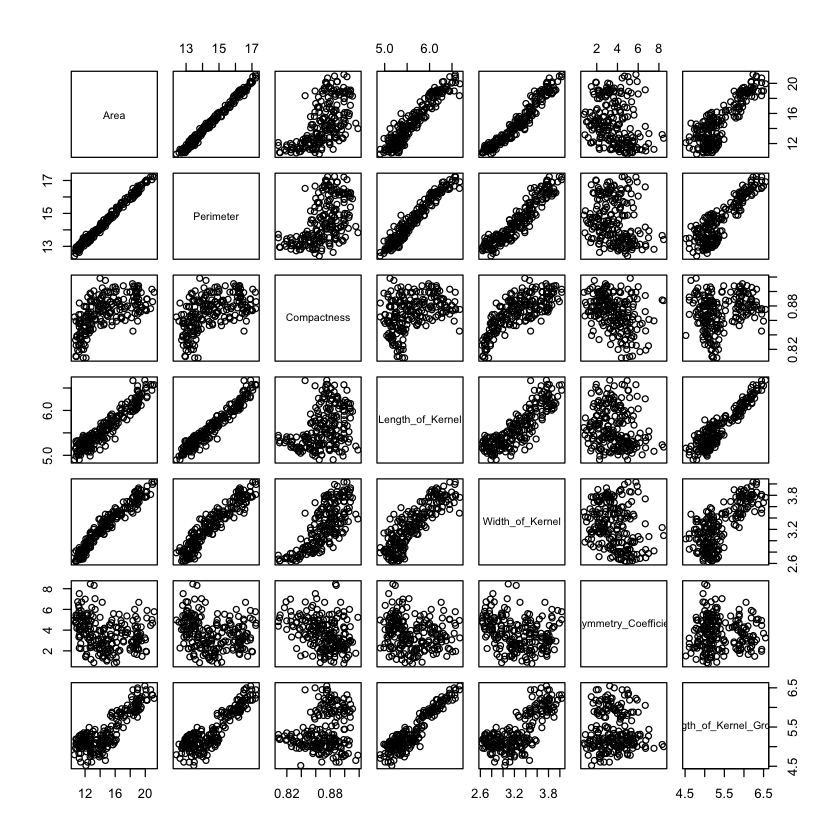

In [5]:

plot(seeds[,1:7])
scale_data <- scale(seeds[1:7], center = TRUE, scale = TRUE)


This plot is a scatter plot matrix showing pairwise relationships between different variables.

In the plot, Area and Perimeter have a strong positive correlation, indicated by the linear pattern. Similarly, Length_of_Kernel and Width_of_Kernel show a positive relationship, reflecting that as kernel length increases, the width also increases.

Asymmetry_Coefficient and Compactness display weaker relationships with other variables, as indicated by the lack of clear patterns.

Overall, this scatter plot matrix helps visualize pairwise relationships and distributions, aiding in understanding the data structure and identifying potential correlations.

No id variables; using all as measure variables



No id variables; using all as measure variables




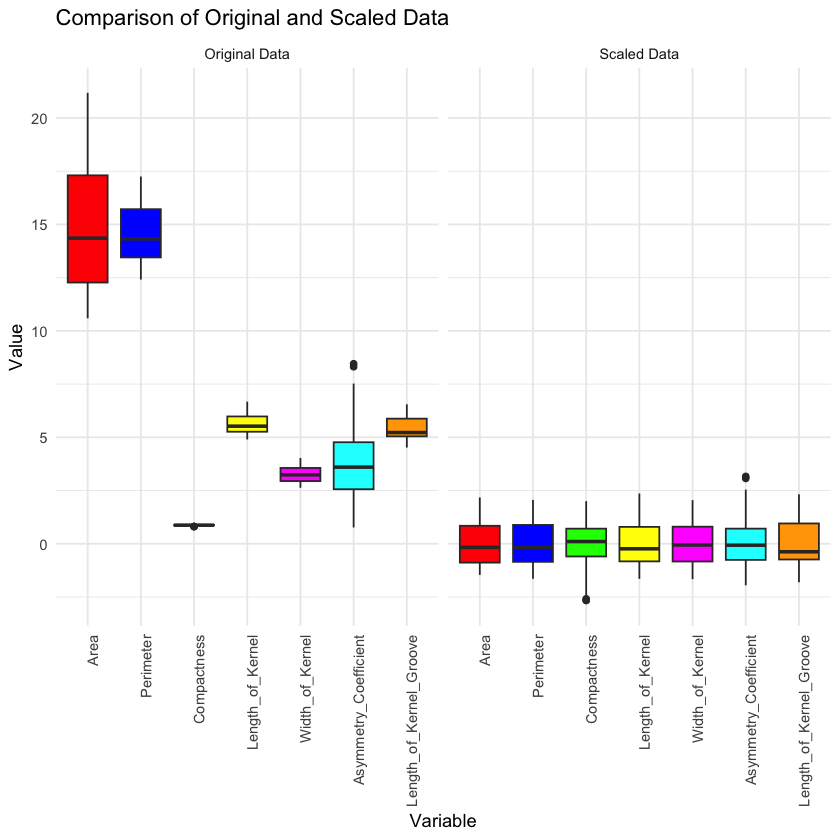

In [6]:

seeds <- seeds[, 1:7]

seeds_long <- melt(seeds, variable.name = "variable", value.name = "value")
scale_data_long <- melt(as.data.frame(scale_data), variable.name = "variable", value.name = "value")

seeds_long$source <- "Original Data"
scale_data_long$source <- "Scaled Data"

combined_data <- rbind(seeds_long, scale_data_long)

combined_data$variable <- factor(combined_data$variable, levels = unique(combined_data$variable))

variable_colors <- c(
  "Area" = "#FF0000",
  "Perimeter" = "#0000FF",
  "Compactness" = "#00FF00",
  "Length_of_Kernel" = "#FFFF00",
  "Width_of_Kernel" = "#FF00FF",
  "Asymmetry_Coefficient" = "#00FFFF",
  "Length_of_Kernel_Groove" = "#FFA500"
)

ggplot(combined_data, aes(y = variable, x = value, fill = variable)) +
  geom_boxplot() +
  facet_wrap(~ source, ncol = 2) +
  scale_fill_manual(values = variable_colors) +
  labs(title = "Comparison of Original and Scaled Data",
       x = "Value", y = "Variable") +
  theme_minimal() +
  theme(legend.position = "none",
        axis.text.x = element_text(angle = 90, hjust = 1)) +
  coord_flip()





The boxplot visualization effectively demonstrates the importance of data scaling in preprocessing. In the original data, variables such as Area and Perimeter dominate due to their larger values and ranges. However, after scaling, all variables are brought to a comparable range, ensuring equal contribution to subsequent analyses. This standardization is crucial for improving the performance and accuracy of clustering algorithms like k-means and k-medoids, highlighting the necessity of scaling in machine learning workflows.

# PCA

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2430 1.0943 0.82341 0.26147 0.13680 0.07302 0.02850
Proportion of Variance 0.7187 0.1711 0.09686 0.00977 0.00267 0.00076 0.00012
Cumulative Proportion  0.7187 0.8898 0.98668 0.99645 0.99912 0.99988 1.00000

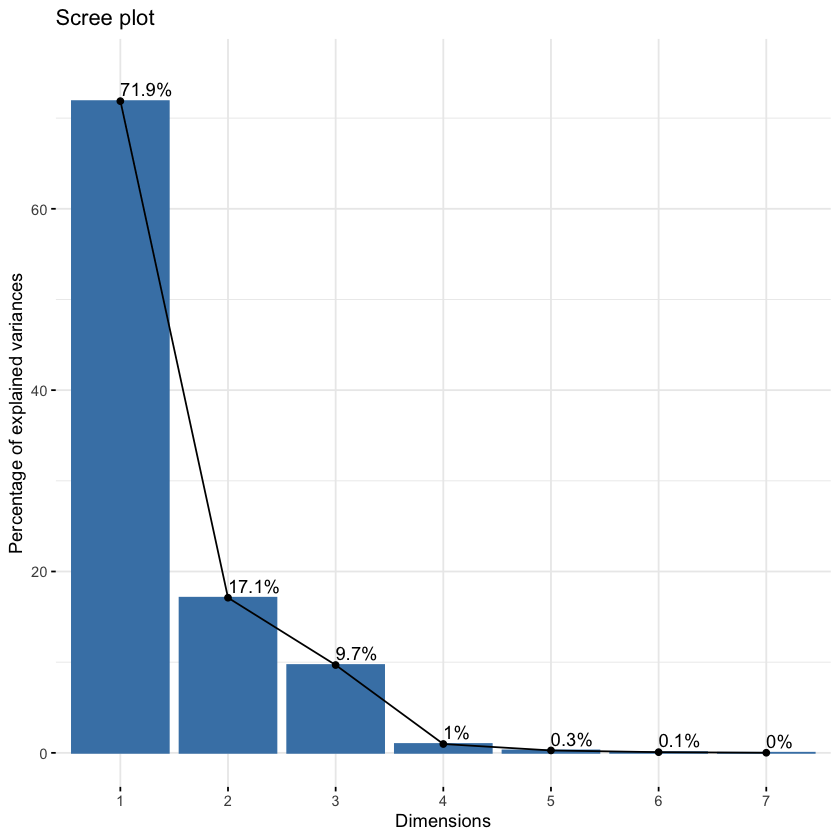

In [7]:
mypr <- prcomp(seeds[,1:7], center = T, scale = T)
summary(mypr)
fviz_eig(mypr, addlabels = TRUE, ylim = c(0, 75))
var <- get_pca_var(mypr)


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7
Area,0.99394755,0.0008450341,0.0004537914,0.0025634244,0.0007819319,9.696239e-04,4.386450e-04
Perimeter,0.98101057,0.0084506414,0.0024277403,0.0059678495,0.0005683714,1.209325e-03,3.655035e-04
Compactness,0.38608745,0.3353216539,0.2688363174,0.0075725112,0.0020708334,1.069541e-04,4.276371e-06
Length_of_Kernel,0.90262715,0.0508079572,0.0304376025,0.0047433348,0.0109831433,3.990721e-04,1.739726e-06
Width_of_Kernel,0.94250493,0.0163067144,0.0317746687,0.0027244812,0.0040527146,2.635233e-03,1.254041e-06
Asymmetry_Coefficient,0.07087908,0.6154564499,0.3130532976,0.0005844986,0.0000246020,2.057118e-06,1.126317e-08
Length_of_Kernel_Groove,0.75414445,0.1703843961,0.0310200207,0.0442083772,0.0002320124,9.781033e-06,9.668487e-07


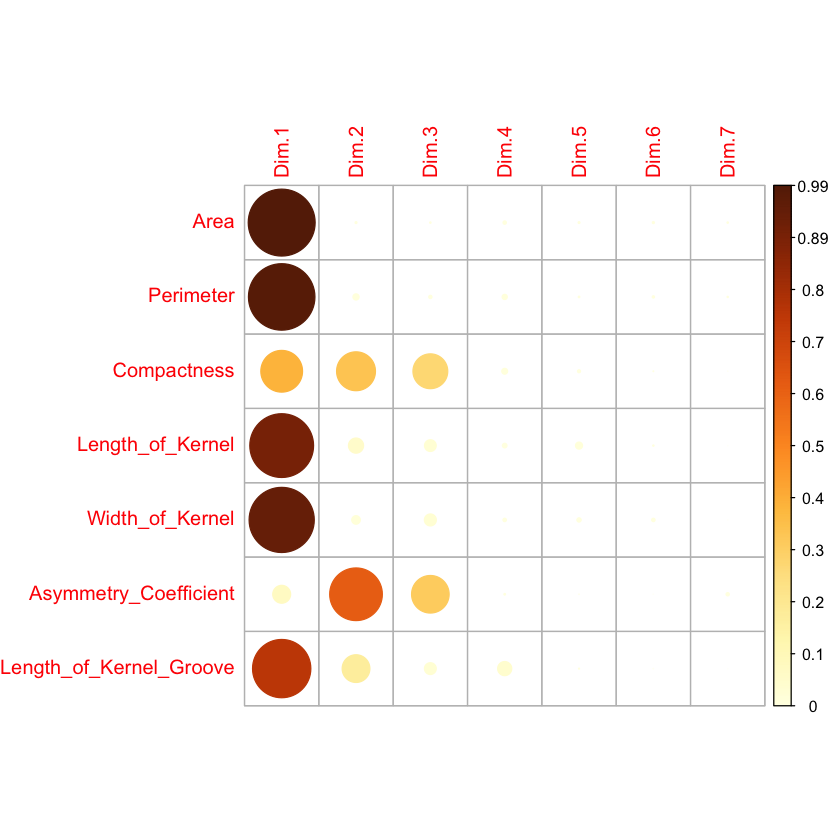

In [8]:

var$cos2
corrplot(var$cos2, is.corr=FALSE)


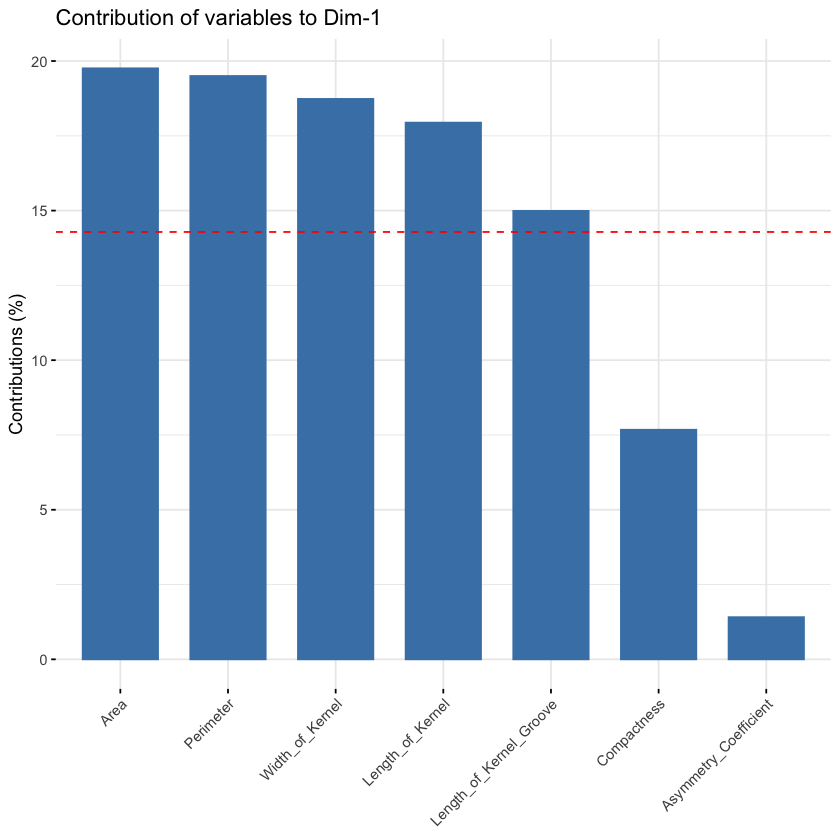

In [9]:

    fviz_contrib(mypr, choice = "var", axes = 1, top = 7)


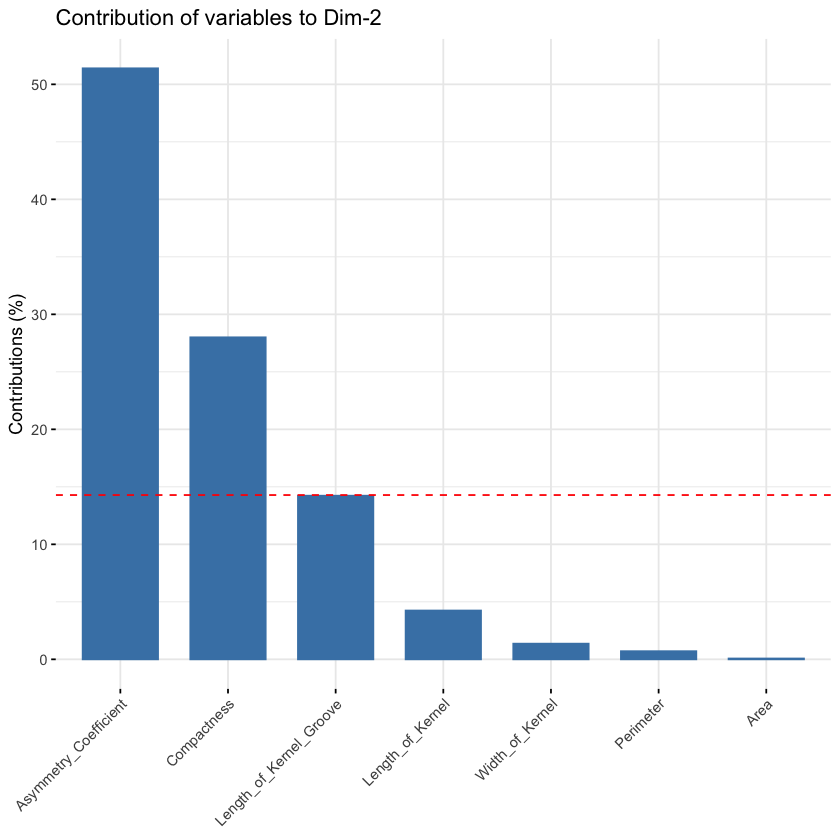

In [10]:
fviz_contrib(mypr, choice = "var", axes = 2, top = 7)


In the PCA (Principal Component Analysis) analysis, it was observed that the first two components explained 88.98% of the variance in the data. The scree plot illustrates that the first component (PC1) explains 71.87% of the variance, while the second component (PC2) accounts for 17.11%. These results indicate that a significant portion of our dataset can be represented by these two components, making it feasible to analyze the data in a two-dimensional space using PCA.

When examining the relationship between the variables and the principal components, it is evident that Area, Perimeter, Length_of_Kernel, Width_of_Kernel, and Length_of_Kernel_Groove show a high correlation with PC1. These variables contribute significantly to PC1 and are associated with physical dimensions. On the other hand, Asymmetry_Coefficient and Compactness exhibit a high correlation with PC2. This suggests that these two variables are more prominent in PC2, reflecting attributes related to asymmetry and compactness.

Analyzing the contribution of variables to the components, it is found that Area, Perimeter, Length_of_Kernel, Width_of_Kernel, and Length_of_Kernel_Groove provide the most significant contributions to PC1. This indicates that PC1 is predominantly influenced by these physical dimensions. Conversely, Asymmetry_Coefficient, Compactness, and Length_of_Kernel_Groove contribute the most to PC2. This result shows that PC2 is largely associated with asymmetry and compactness.

In summary, a substantial portion of the data's variance can be explained by the first two principal components. The first principal component (PC1) is mainly related to physical dimensions such as surface area, perimeter length, kernel length, kernel width, and groove length. In contrast, the second principal component (PC2) is more associated with asymmetry and compactness. This analysis demonstrates that the data can be effectively examined by reducing it to two dimensions, facilitating meaningful insights. Reducing the data to two dimensions also offers significant advantages in terms of visualization and interpretation.








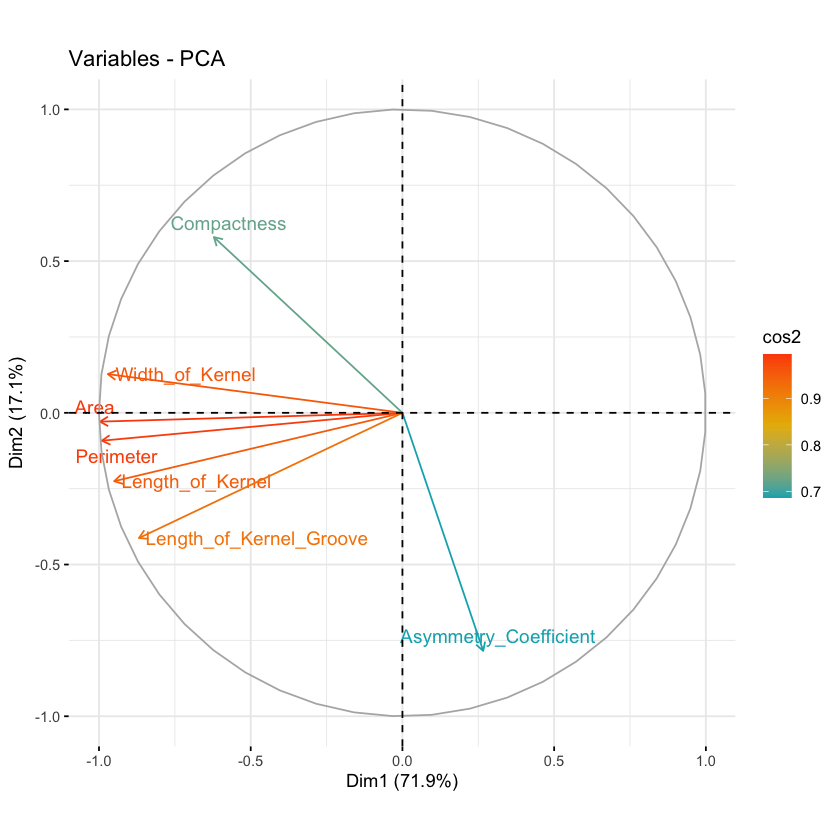

In [11]:

fviz_pca_var(mypr, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping
)


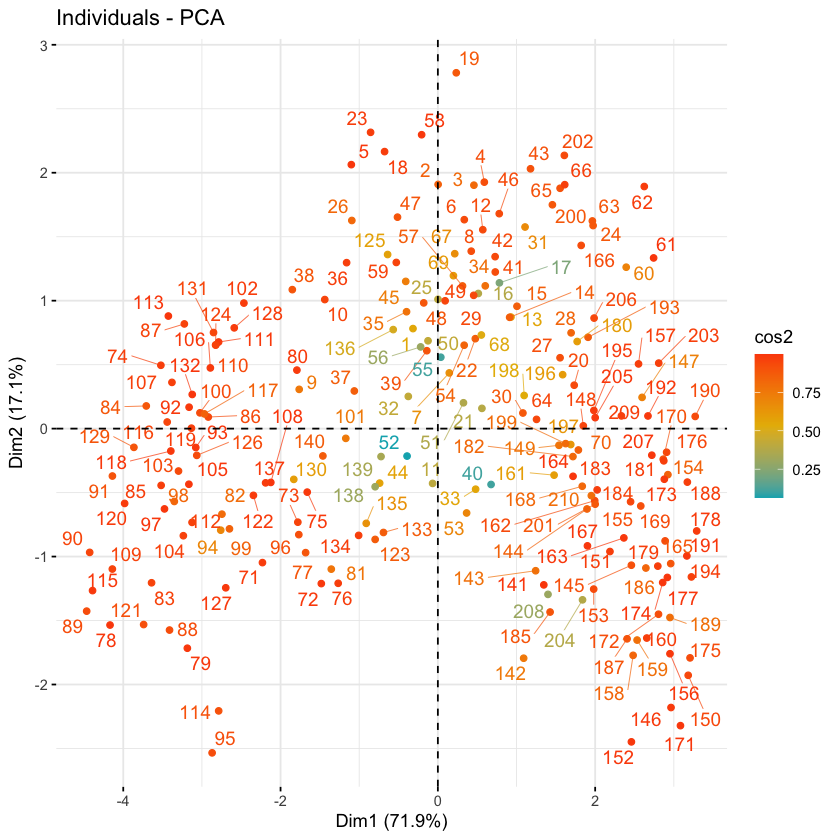

In [12]:
fviz_pca_ind(mypr,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping
)


In the variable plot, PC1 is mainly associated with Area, Perimeter, Length of Kernel, Width of Kernel, and Length of Kernel Groove, while PC2 is dominated by the Asymmetry Coefficient and Compactness. The variable contributions highlight that most of the variance in the data is captured by the size-related attributes in PC1, whereas the shape-related attributes contribute more to PC2.

The individual plot demonstrates the distribution of data points (kernels) along the first two principal components. It shows that the kernels are spread across the dimensions, with some clustering evident, suggesting that different wheat varieties have distinct geometrical properties. The color gradient in the individual plot indicates the quality of representation of each kernel on the first two components, with red showing high cos2 values (better representation) and yellow indicating lower cos2 values (poorer representation).

# SELECTION OF THE NUMBER OF CLUSTERS

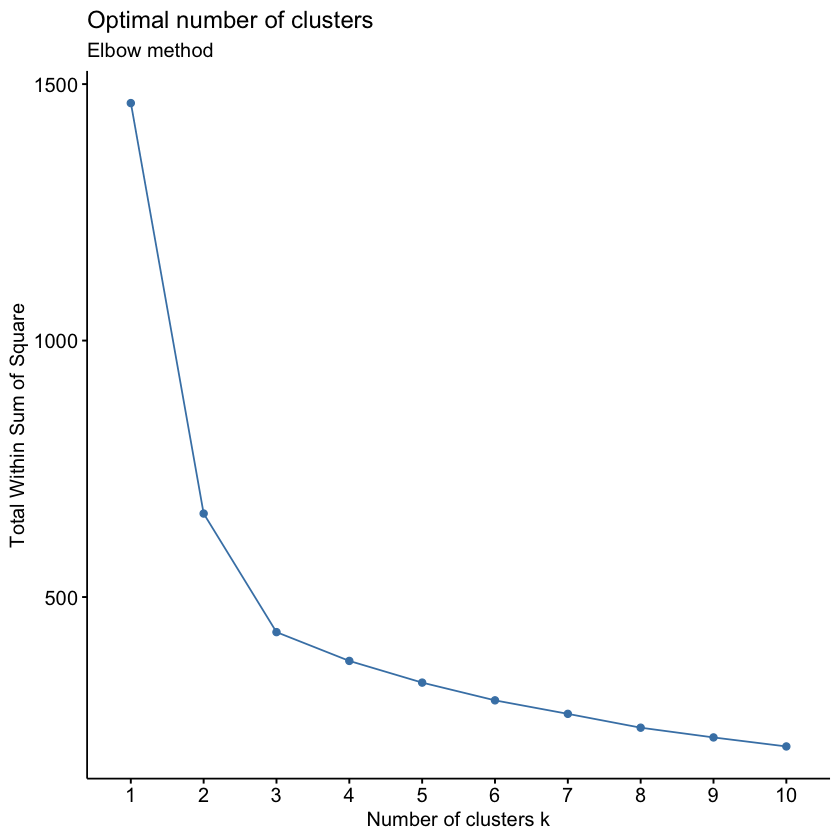

In [13]:
set.seed(123)
fviz_nbclust(scale_data,pam,method = "wss",nstart = 25)+
  labs(subtitle = "Elbow method")


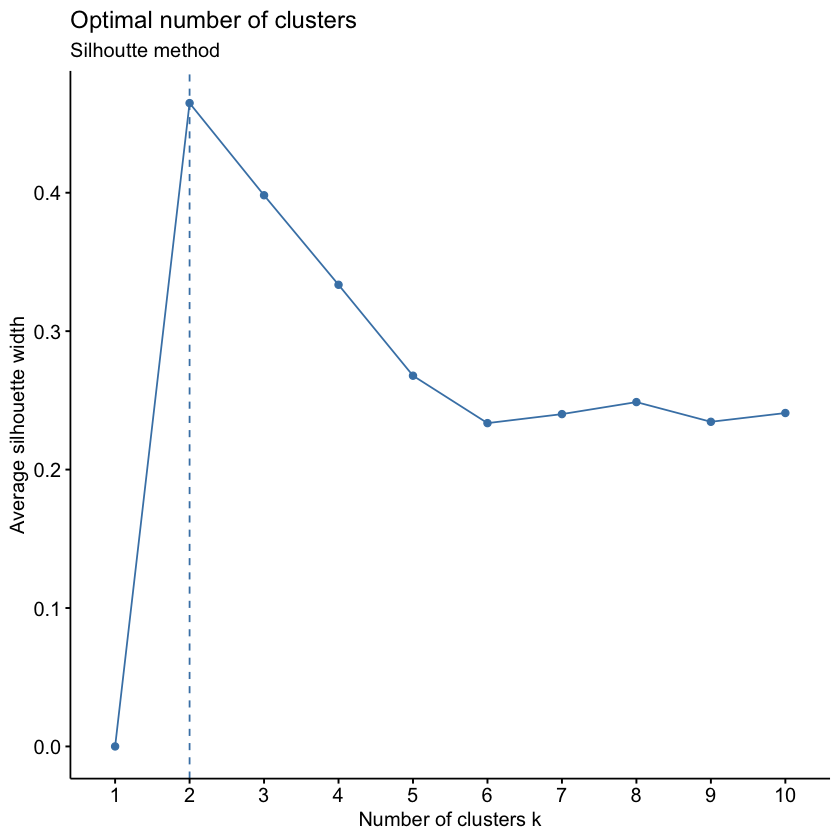

In [14]:
fviz_nbclust(scale_data,pam,method = "silhouette")+ #for average silhouette width
  labs(subtitle = "Silhoutte method")


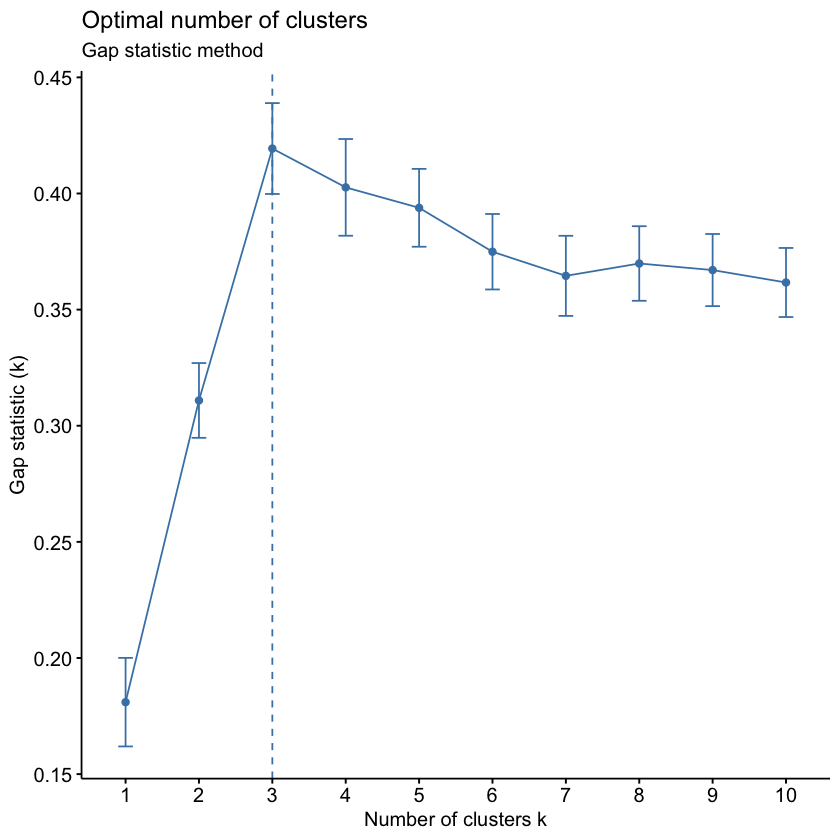

In [15]:
fviz_nbclust(scale_data, pam, method= "gap")+
  labs(subtitle = "Gap statistic method") #or gap statistics


The analysis of the graphs leads to a logical conclusion regarding the choice of the number of clusters. In the first graph, the Elbow Method is used to determine the optimal number of clusters. This graph shows that as the number of clusters increases, the total within sum of squares decreases. A noticeable 'elbow' point occurs at three clusters, indicating that this point significantly reduces the total within variance and is considered the optimal number of clusters.

In the second graph, the Silhouette Method is used to evaluate the number of clusters. This method assesses how well each point is clustered within its cluster. The silhouette width is highest at two clusters, around 0.4. Although this method generally suggests a higher optimal number of clusters, it should be considered alongside other methods to reach a definitive conclusion.

The third graph uses the Gap Statistic Method to measure the difference between the actual clustering of the data and the clustering of randomly generated reference data. The highest gap value indicates the optimal number of clusters. This graph shows the highest gap value at three clusters, with a subsequent decline.

In conclusion, when these three graphs are evaluated together, it is observed that both the Elbow Method and Gap Statistic Method converge at three clusters. This strongly suggests that three is the optimal number of clusters. Although the Silhouette Method suggests two clusters, the overall trend and the results from other methods indicate that three clusters are more appropriate. Therefore, considering all the graphs and methods, it is concluded that the optimal number of clusters is three.

# K-Medoids

## K-Medoids Clustering on Scaled Data

In [16]:
set.seed(123)
pam_data_scaled <- pam(scale_data,3)
print(pam_data_scaled)
pam_data_scaled$medoids
pam_data_scaled$clustering
pam_data_scaled$clusinfo


Medoids:

      ID        Area  Perimeter Compactness Length_of_Kernel Width_of_Kernel

[1,]  49 -0.01976967 -0.0300819   0.4613499       -0.1885358      0.08576648

[2,] 105  1.40993126  1.4247880   0.5036700        1.3981443      1.31420772

[3,] 163 -0.96144769 -0.8800322  -1.2441514       -0.8159854     -1.08972470

     Asymmetry_Coefficient Length_of_Kernel_Groove

[1,]            -0.6625628              -0.6044419

[2,]            -0.2209434               1.5055095

[3,]             0.8565016              -0.7366954

Clustering vector:

  [1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 3 1 1 1 1 1 3 2 2 2 2

 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2

[112] 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 2 3 3 3 3 3 3 3 3

[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[186] 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 3 3 3

Area,Perimeter,Compactness,Length_of_Kernel,Width_of_Kernel,Asymmetry_Coefficient,Length_of_Kernel_Groove
-0.01976967,-0.0300819,0.4613499,-0.1885358,0.08576648,-0.6625628,-0.6044419
1.40993126,1.4247880,0.5036700,1.3981443,1.31420772,-0.2209434,1.5055095
-0.96144769,-0.8800322,-1.2441514,-0.8159854,-1.08972470,0.8565016,-0.7366954


[1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 3 1 1 1 1 1 3 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 2 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 3 3 3 3 3 3 3 3

size,max_diss,av_diss,diameter,separation
77,2.769122,1.400510,4.601093,0.5747312
62,2.334422,1.322603,3.954075,0.5747312
71,3.168492,1.331149,5.155598,0.6125787


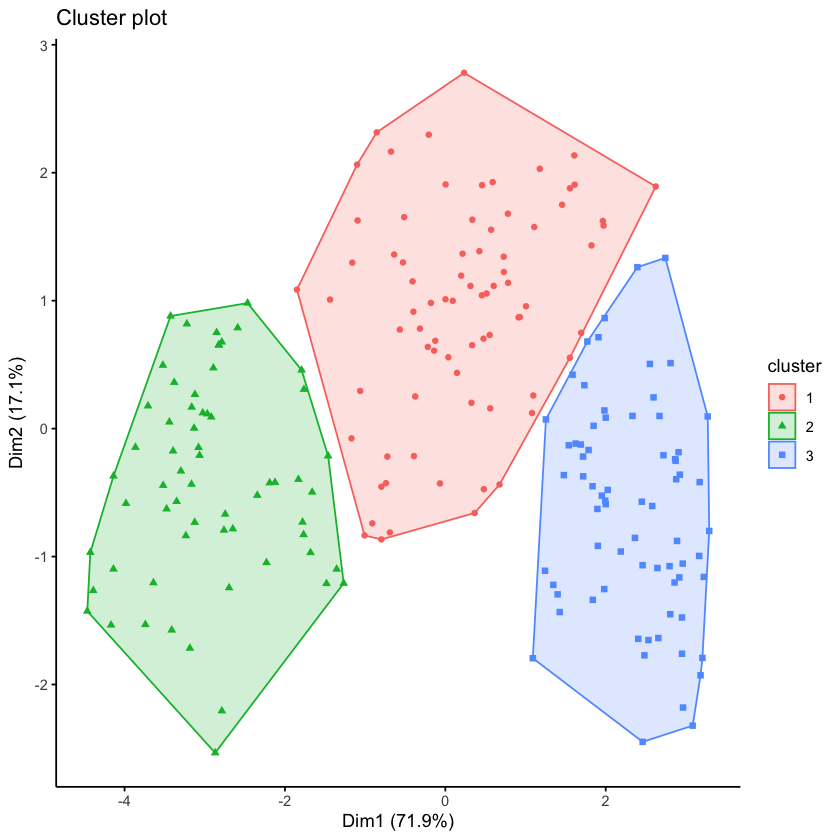

In [17]:

fviz_cluster(pam_data_scaled,
             ellipse.type = "convex",
             repel = TRUE, 
             geom = "point",
             ggtheme = theme_classic()
)


The cluster plot illustrates the result of K-Medoids clustering on the scaled data. Three distinct clusters are identified, each represented by a different color and shape. The separation between clusters is evident, suggesting that the data points within each cluster are more similar to each other than to those in other clusters. This visual representation supports the conclusion that three clusters are an appropriate choice for this dataset, providing clear and distinct groupings of the wheat kernel data.

In [18]:

summary(seeds[1:7])
aggregate(seeds[1:7], by=list(pam_data_scaled$clustering), mean)  
aggregate(seeds[1:7], by=list(pam_data_scaled$clustering), sd)


      Area         Perimeter      Compactness     Length_of_Kernel
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899   
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:0.8569   1st Qu.:5.262   
 Median :14.36   Median :14.32   Median :0.8734   Median :5.524   
 Mean   :14.85   Mean   :14.56   Mean   :0.8710   Mean   :5.629   
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:0.8878   3rd Qu.:5.980   
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675   
 Width_of_Kernel Asymmetry_Coefficient Length_of_Kernel_Groove
 Min.   :2.630   Min.   :0.7651        Min.   :4.519          
 1st Qu.:2.944   1st Qu.:2.5615        1st Qu.:5.045          
 Median :3.237   Median :3.5990        Median :5.223          
 Mean   :3.259   Mean   :3.7002        Mean   :5.408          
 3rd Qu.:3.562   3rd Qu.:4.7687        3rd Qu.:5.877          
 Max.   :4.033   Max.   :8.4560        Max.   :6.550          

Group.1,Area,Perimeter,Compactness,Length_of_Kernel,Width_of_Kernel,Asymmetry_Coefficient,Length_of_Kernel_Groove
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.51558,14.37455,0.8815247,5.524286,3.268597,2.794639,5.152299
2,18.67435,16.28065,0.8845500,6.207065,3.715113,3.591484,6.070113
3,11.86577,13.25648,0.8477493,5.236394,2.849127,4.777225,5.107338


Group.1,Area,Perimeter,Compactness,Length_of_Kernel,Width_of_Kernel,Asymmetry_Coefficient,Length_of_Kernel_Groove
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.1813022,0.5899611,0.01554290,0.2378912,0.1670804,1.196911,0.3009734
2,1.1439988,0.4889697,0.01463800,0.2181730,0.1567115,1.236550,0.2113246
3,0.7159223,0.3499228,0.01962849,0.1371776,0.1396313,1.331478,0.1789998


* **Cluster 1:** Medium-Sized and Balanced Grains
This cluster represents medium-sized grains with balanced compactness. The asymmetry coefficient is relatively low, indicating that the grains are more symmetrical.

* **Cluster 2:** Large and Wide Grains
This cluster represents larger and wider grains. The high compactness and asymmetry coefficient suggest that the grains are bigger and less symmetrical.

* **Cluster** 3: Small and Compact Grains
This cluster includes small-sized and compact grains. The high asymmetry coefficient indicates that the grains are less symmetrical and more irregularly shaped.



## K-Medoids Clustering on PCA Transformed Data








In [19]:
summary(mypr)
set.seed(123)


Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2430 1.0943 0.82341 0.26147 0.13680 0.07302 0.02850
Proportion of Variance 0.7187 0.1711 0.09686 0.00977 0.00267 0.00076 0.00012
Cumulative Proportion  0.7187 0.8898 0.98668 0.99645 0.99912 0.99988 1.00000

In [20]:

data <- as.data.frame(mypr$x[, 1:2])
summary(data)


      PC1               PC2         
 Min.   :-4.4650   Min.   :-2.5342  
 1st Qu.:-1.8219   1st Qu.:-0.8087  
 Median : 0.3508   Median :-0.1274  
 Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 1.9078   3rd Qu.: 0.7861  
 Max.   : 3.2911   Max.   : 2.7811  

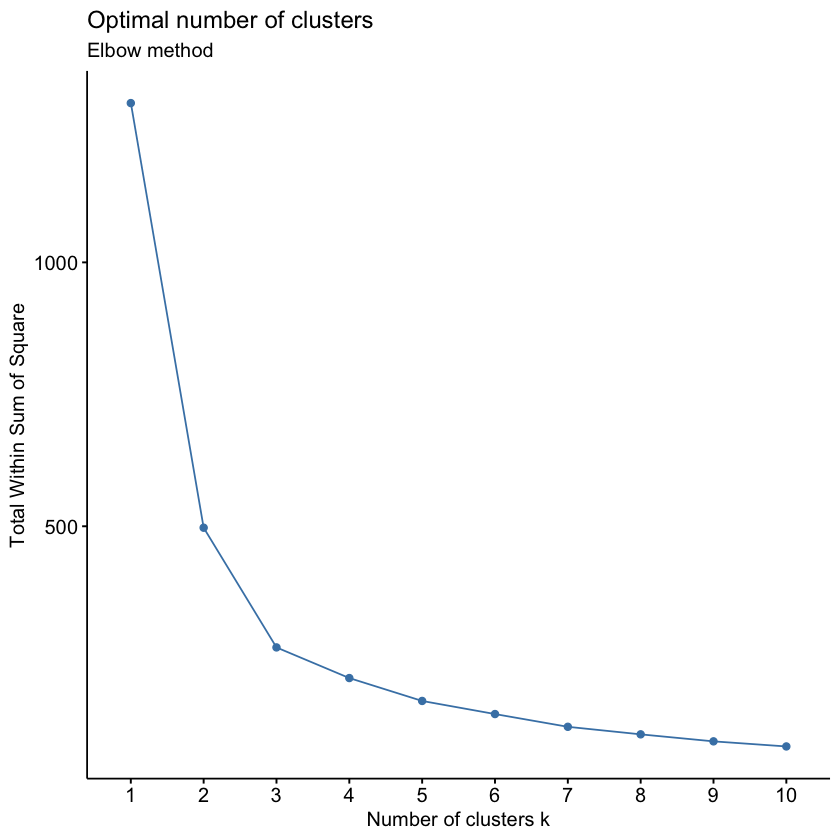

In [21]:

fviz_nbclust(data,pam,method = "wss",nstart = 25)+
  labs(subtitle = "Elbow method")


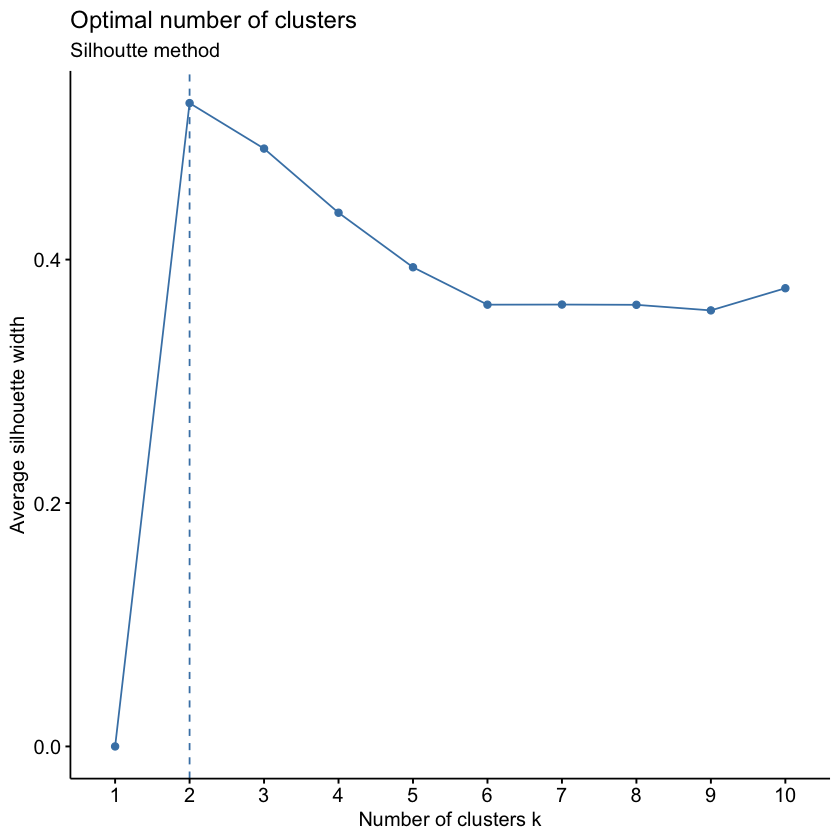

In [22]:
fviz_nbclust(data,pam,method = "silhouette")+ #for average silhouette width
  labs(subtitle = "Silhoutte method")


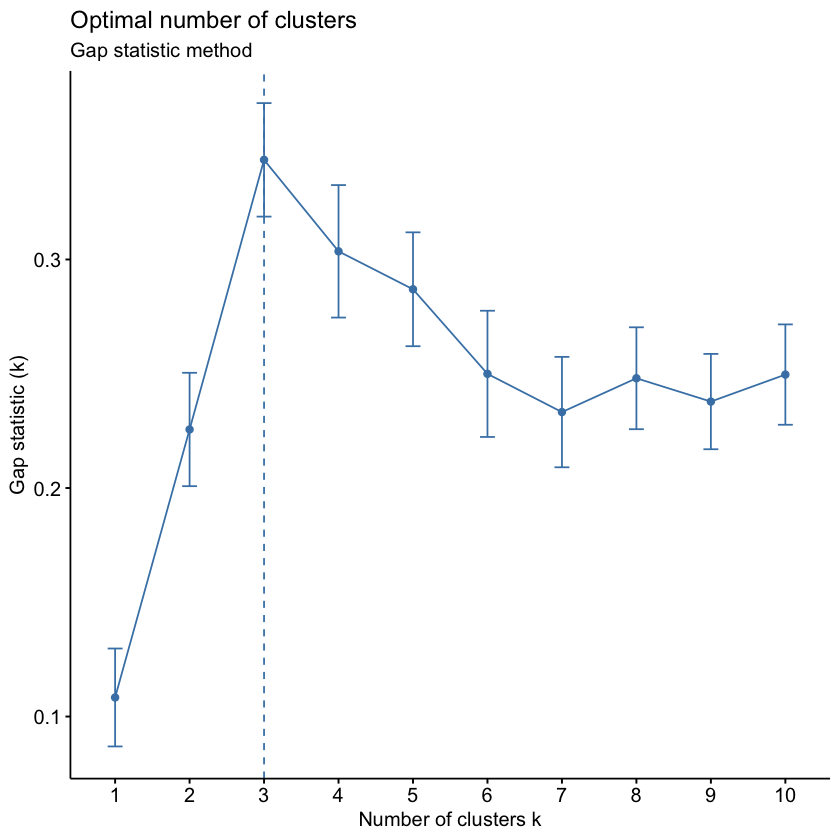

In [23]:
fviz_nbclust(data, pam, method= "gap")+
  labs(subtitle = "Gap statistic method") #or gap statistics


In [24]:
pam_data_pca <- pam(data,3)
print(pam_data_pca)
pam_data_pca$medoids
pam_data_pca$clustering
pam_data_pca$clusinfo



Medoids:

      ID         PC1        PC2

[1,]  49  0.09237903  0.9989885

[2,] 126 -3.06510214 -0.2091063

[3,] 184  2.45030353 -0.5713493

Clustering vector:

  [1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1

 [38] 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 1 3 1 1 1 1 1 3 2 2 2 2

 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2

[112] 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 2 3 3 3 3 3 3 3 3

[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[186] 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 3 3 3 3 3 3 3 3

Objective function:

   build     swap 

1.090709 1.018377 



Available components:

 [1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 

 [6] "clusinfo"   "silinfo"    "diss"       "call"       "data"      


PC1,PC2
0.09237903,0.9989885
-3.06510214,-0.2091063
2.45030353,-0.5713493


[1] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1
 [38] 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 1 3 1 1 1 1 1 3 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 2 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 3 3 3 3 3 3 3 3

size,max_diss,av_diss,diameter,separation
73,2.137912,1.0600373,3.957384,0.1803879
63,2.333222,1.0237521,3.761285,0.3221577
74,2.469755,0.9727041,4.343624,0.1803879


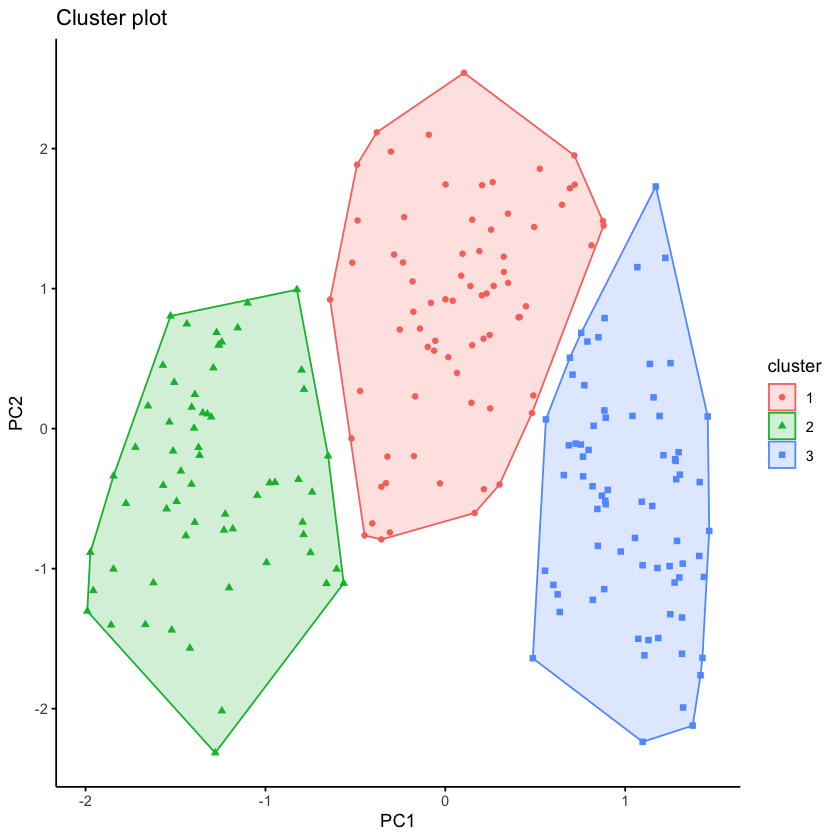

In [25]:
fviz_cluster(pam_data_pca,
             ellipse.type = "convex", 
             repel = TRUE, 
             geom = "point",
             ggtheme = theme_classic()
)


The PCA plot displays the k-medoids clustering results based on the first two principal components (PC1 and PC2). The data points are grouped into three distinct clusters, each enclosed by a convex hull to indicate the boundaries of the clusters.

Cluster 1 (red) occupies the central region of the plot, indicating it contains individuals with moderate values on both PC1 and PC2. Cluster 2 (green) is situated to the left, comprising individuals with lower values on PC1 and a spread of values on PC2. Cluster 3 (blue) is located to the right, containing individuals with higher values on PC1 and a range of values on PC2.

In [26]:
summary(seeds)


      Area         Perimeter      Compactness     Length_of_Kernel
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899   
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:0.8569   1st Qu.:5.262   
 Median :14.36   Median :14.32   Median :0.8734   Median :5.524   
 Mean   :14.85   Mean   :14.56   Mean   :0.8710   Mean   :5.629   
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:0.8878   3rd Qu.:5.980   
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675   
 Width_of_Kernel Asymmetry_Coefficient Length_of_Kernel_Groove
 Min.   :2.630   Min.   :0.7651        Min.   :4.519          
 1st Qu.:2.944   1st Qu.:2.5615        1st Qu.:5.045          
 Median :3.237   Median :3.5990        Median :5.223          
 Mean   :3.259   Mean   :3.7002        Mean   :5.408          
 3rd Qu.:3.562   3rd Qu.:4.7687        3rd Qu.:5.877          
 Max.   :4.033   Max.   :8.4560        Max.   :6.550          

# CONCLUSION

[1] "Accuracy Score for PAM on Scaled Data: 0.90952380952381"


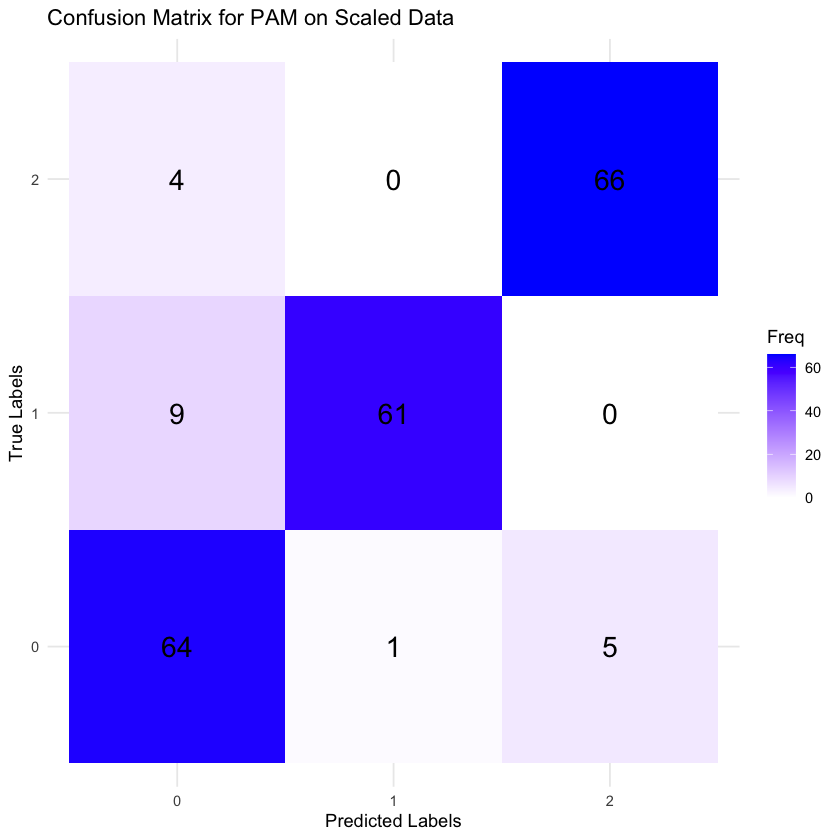

[1] "Accuracy Score for PAM on PCA Data: 0.89047619047619"


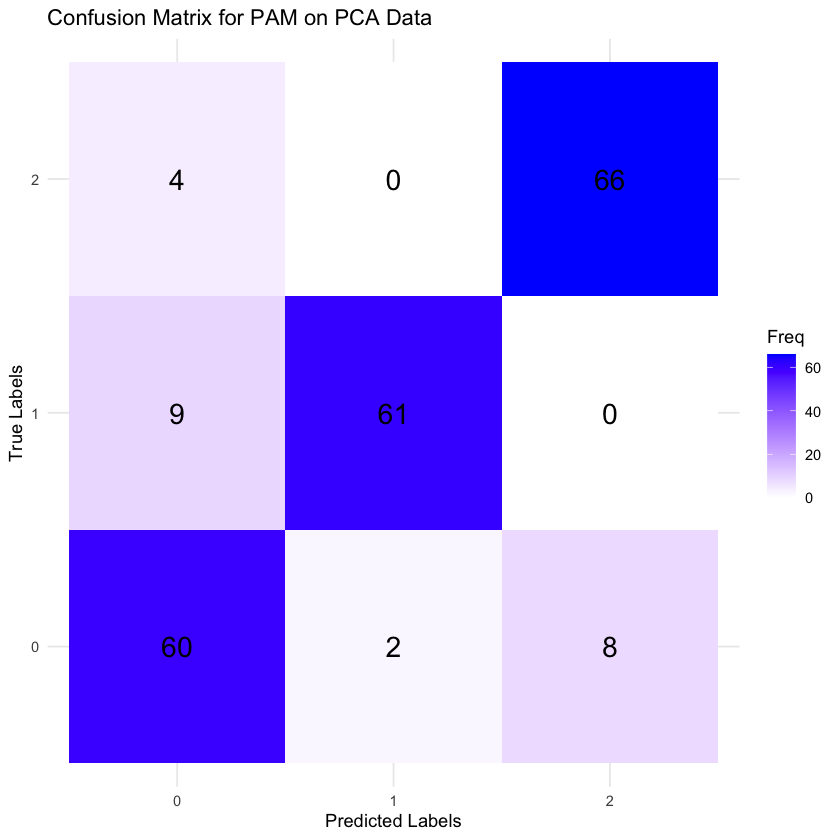

In [27]:
libraries <- c("plotly", "corrplot", "pastecs", "dplyr", "factoextra", "tidyverse", "ggplot2", "reshape2", "caret", "cluster", "ggpubr")

load_libraries <- function(libraries) {
  for (lib in libraries) {
    if (!require(lib, character.only = TRUE)) {
      install.packages(lib, dependencies = TRUE)
      suppressPackageStartupMessages(library(lib, character.only = TRUE))
    } else {
      suppressPackageStartupMessages(library(lib, character.only = TRUE))
    }
  }
}

load_libraries(libraries)

seeds <- read.csv("Seed_Data.csv", header = FALSE)
seeds <- seeds[-1, ]
col_names <- c("Area", "Perimeter", "Compactness", "Length_of_Kernel", "Width_of_Kernel", "Asymmetry_Coefficient", "Length_of_Kernel_Groove", "Varieties_of_Wheat")
colnames(seeds) <- col_names
seeds <- data.frame(lapply(seeds, as.numeric))
seeds$Varieties_of_Wheat <- factor(seeds$Varieties_of_Wheat)

pca_result <- prcomp(seeds[, 1:7], center = TRUE, scale = TRUE)
pca_data <- as.data.frame(pca_result$x[, 1:2])

set.seed(123)
pam_data_scaled <- pam(scale(seeds[, 1:7]), 3)

pam_data_pca <- pam(pca_data, 3)

align_labels <- function(predicted_labels, true_labels) {
  aligned_labels <- rep(NA, length(predicted_labels))
  unique_clusters <- unique(predicted_labels)
  for (cluster in unique_clusters) {
    class_counts <- table(true_labels[predicted_labels == cluster])
    if (length(class_counts) > 0) {
      true_class <- names(sort(class_counts, decreasing = TRUE))[1]
      aligned_labels[predicted_labels == cluster] <- true_class
    }
  }
  return(aligned_labels)
}

true_labels <- seeds$Varieties_of_Wheat

pam_labels_scaled <- pam_data_scaled$clustering
aligned_labels_scaled <- align_labels(pam_labels_scaled, true_labels)

conf_matrix_scaled <- table(aligned_labels_scaled, true_labels)
accuracy_scaled <- sum(diag(conf_matrix_scaled)) / sum(conf_matrix_scaled)

conf_matrix_scaled_long <- as.data.frame(as.table(conf_matrix_scaled))
colnames(conf_matrix_scaled_long) <- c("Predicted", "True", "Freq")
ggplot(data = conf_matrix_scaled_long, aes(x = Predicted, y = True, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "blue") +
  geom_text(aes(label = Freq), size = 6) +
  labs(title = "Confusion Matrix for PAM on Scaled Data",
       x = "Predicted Labels", y = "True Labels", fill = "Freq") +
  theme_minimal()

print(paste("Accuracy Score for PAM on Scaled Data:", accuracy_scaled))

pam_labels_pca <- pam_data_pca$clustering
aligned_labels_pca <- align_labels(pam_labels_pca, true_labels)

conf_matrix_pca <- table(aligned_labels_pca, true_labels)
accuracy_pca <- sum(diag(conf_matrix_pca)) / sum(conf_matrix_pca)

conf_matrix_pca_long <- as.data.frame(as.table(conf_matrix_pca))
colnames(conf_matrix_pca_long) <- c("Predicted", "True", "Freq")
ggplot(data = conf_matrix_pca_long, aes(x = Predicted, y = True, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "blue") +
  geom_text(aes(label = Freq), size = 6) +
  labs(title = "Confusion Matrix for PAM on PCA Data",
       x = "Predicted Labels", y = "True Labels", fill = "Freq") +
  theme_minimal()

# Print accuracy
print(paste("Accuracy Score for PAM on PCA Data:", accuracy_pca))


When comparing the clustering results of PAM algorithm on scaled data and PCA-transformed data, it is observed that PCA-transformed data provides a clearer separation of clusters. The PCA method, by reducing the dimensionality of the data and focusing on components that capture the most variance, makes the separation of clusters more visually distinct.

However, the accuracy results show that scaled data achieves approximately 90.95% accuracy, while PCA-transformed data achieves 89.05% accuracy. These accuracy rates indicate that both methods perform well and are suitable for specific applications.

The confusion matrices reveal that the scaled data accurately represents clusters 1 and 2, but there are some misclassifications between clusters 0 and 2. Similarly, for the PCA data, there are also misclassifications between clusters 0 and 2, but cluster 2 is slightly better represented.

An important insight from this analysis is that PCA might work more effectively with k-means clustering, as demonstrated by achieving a 92% accuracy with PCA-transformed data using k-means. This suggests a potential advantage of using PCA with k-means clustering in certain scenarios.

In conclusion, both scaled data and PCA-transformed data clustering analyses provide valuable insights into the structure of the dataset. The high accuracy rates for both methods highlight their effectiveness and applicability in data analysis. This analysis emphasizes the importance of carefully selecting data preprocessing techniques and clustering algorithms based on the characteristics of the dataset and the objectives of the analysis.